In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [8]:
print(df.nunique())

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [9]:
df["log_charges"] = np.log2(df["charges"])
df.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,14.043448
1,18,male,33.770,1,no,southeast,1725.55230,10.752842
2,28,male,33.000,3,no,southeast,4449.46200,12.119415
3,33,male,22.705,0,no,northwest,21984.47061,14.424197
4,32,male,28.880,0,no,northwest,3866.85520,11.916945


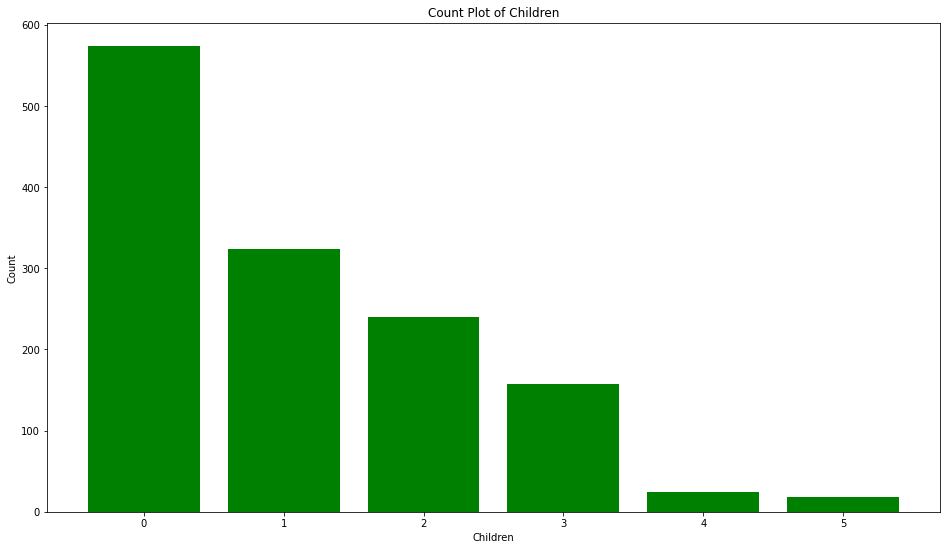

In [10]:
children_counts = df['children'].value_counts()

plt.figure(figsize=(16, 9))
plt.bar(children_counts.index, children_counts, color='g')
plt.title('Count Plot of Children')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()

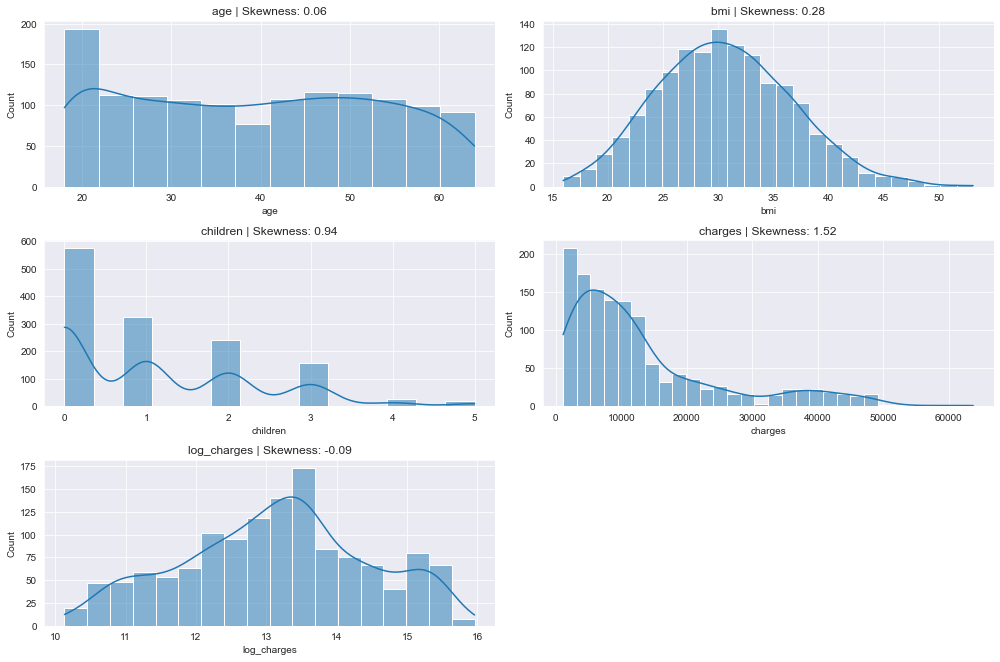

In [11]:
# Here am using the Kernel density plot for understanding variance available in the dataset
sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

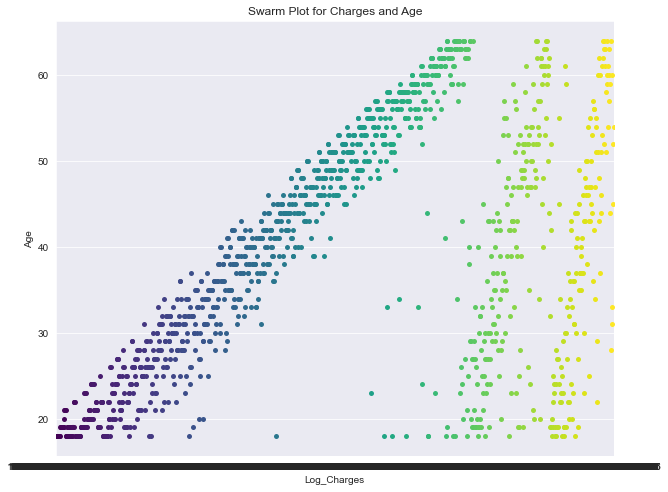

In [12]:
# We are using the swam plot to identify the outliers in our dataset
plt.figure(figsize=(10, 8))

sns.swarmplot(x="log_charges", y="age", data=df, palette='viridis')

plt.title('Swarm Plot for Charges and Age')
plt.xlabel('Log_Charges')
plt.ylabel('Age')
plt.show()

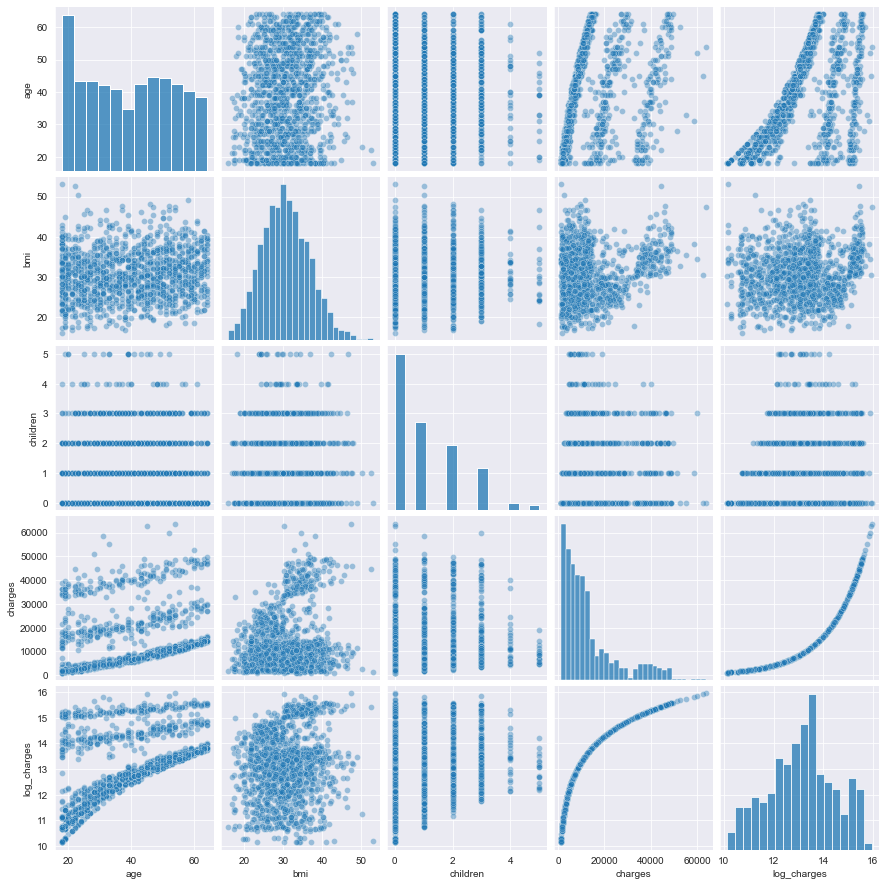

In [13]:
sns.pairplot(df, kind="scatter", plot_kws = {"alpha": 0.4});

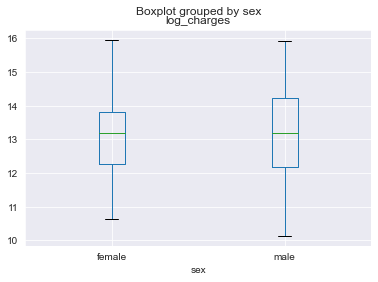

In [14]:
df.boxplot(column=["log_charges"], by="sex")
plt.show()

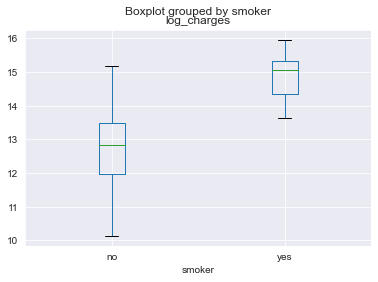

In [15]:
df.boxplot(column=["log_charges"], by="smoker")
plt.show()

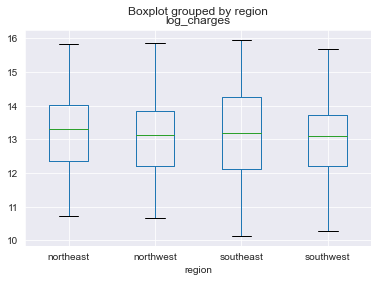

In [16]:
df.boxplot(column=["log_charges"], by="region")
plt.show()

<Figure size 720x576 with 0 Axes>

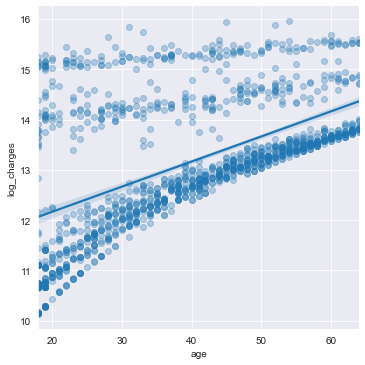

In [17]:
plt.figure(figsize=(10, 8))
sns.lmplot(
    x = "age",
    y = "log_charges",
    data = df,
    scatter_kws = {"alpha": 0.3}
);

<Axes: >

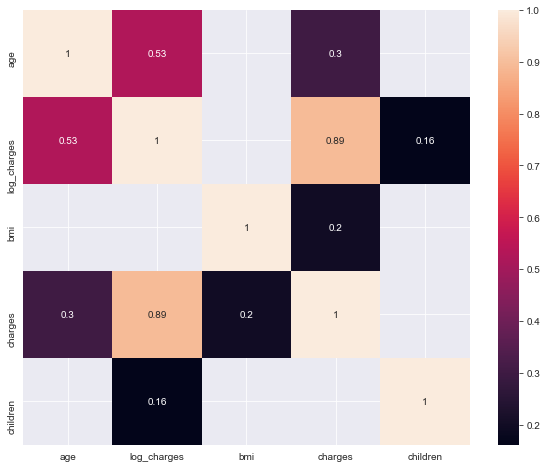

In [18]:
plt.figure(figsize=(10, 8))
corr = df[["age", "log_charges", "bmi", "charges", "children"]].corr()
sns.heatmap(corr[corr>0.15], annot=True, color="r")

In [19]:
#Spliting the data into training and test set
df["smokes"] = (df["smoker"] == "yes")
X = df[["age", "bmi", "smokes"]]
y = df["log_charges"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([0.0508618 , 0.01563733, 2.23214787])

In [21]:
y_pred = model.predict(X_train)
y_pred

array([11.79052705, 12.03861881, 13.41469648, ..., 13.54359685,
       15.05831411, 13.46489784])

In [22]:
train_mse = mean_squared_error(y_train, y_pred)
train_mse

0.44791919632992094

In [23]:
train_mse_orig_scale = np.exp2(mean_squared_error(y_train, y_pred))
train_mse_orig_scale

1.3640714326864813

In [24]:
train_r2 = r2_score(y_train, y_pred)
train_r2

0.743333600772825

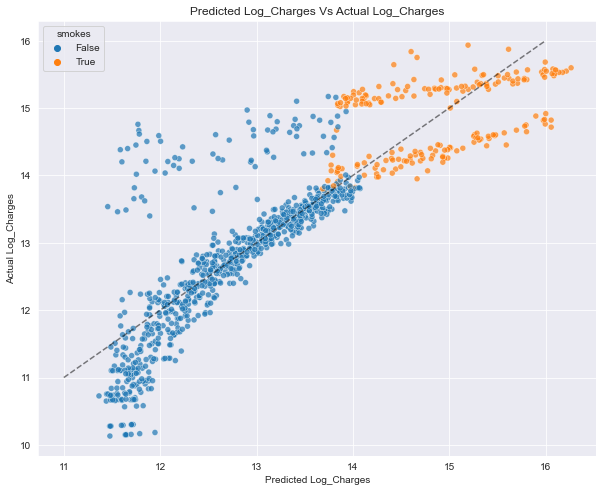

In [25]:
# Next i want to create a dataframe with predictions and actula values for easy ploting
df_new = pd.DataFrame({
    "predictions": y_pred,
    "actual": y_train,
    "smokes": X_train["smokes"],
    "age": X_train["age"],
    "bmi": X_train["bmi"],
    "residuals": y_train - y_pred,
    
})

# create a scatter plot with hue for smokes status
plt.figure(figsize=(10,8))
sns.scatterplot(
    x = "predictions",
    y = "actual",
    data = df_new,
    alpha=0.7,
    hue="smokes"
);
plt.plot([11,16], [11,16], "k--", alpha=0.5);
plt.xlabel("Predicted Log_Charges")
plt.ylabel("Actual Log_Charges")
plt.title("Predicted Log_Charges Vs Actual Log_Charges")
plt.show()


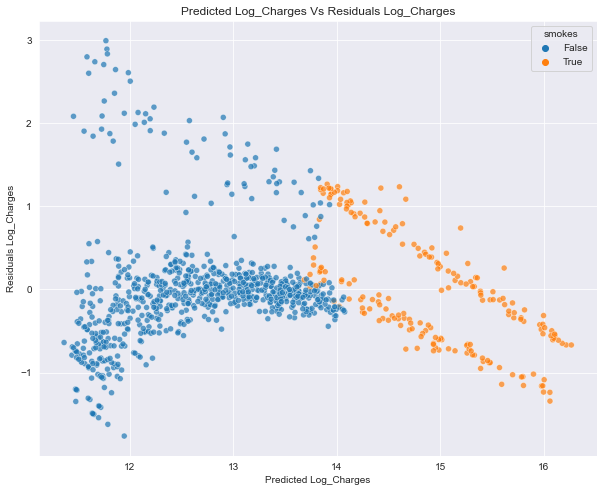

In [26]:
# create a scatter plot with hue for smokes status for Residuals
plt.figure(figsize=(10,8))
sns.scatterplot(
    x = "predictions",
    y = "residuals",
    data = df_new,
    alpha=0.7,
    hue="smokes"
);
#plt.plot([11,16], [11,16], "k--", alpha=0.5);
plt.xlabel("Predicted Log_Charges")
plt.ylabel("Residuals Log_Charges")
plt.title("Predicted Log_Charges Vs Residuals Log_Charges")
plt.show()

In [27]:
test_pred = model.predict(X_test)
mean_squared_error(y_test, test_pred)

0.4529281560931768

In [28]:
# Here we predict the outcome back into the original scale
np.exp2(mean_squared_error(y_test, test_pred))

1.3688156465634753

In [29]:
smokes_df = df[df["smokes"] == True]
smokes_df.head()

,age,sex,bmi,children,smoker,region,charges,log_charges,smokes
0,19,female,27.90,0,yes,southwest,16884.9240,14.043448,True
11,62,female,26.29,0,yes,southeast,27808.7251,14.763250,True
14,27,male,42.13,0,yes,southeast,39611.7577,15.273641,True
19,30,male,35.30,0,yes,southwest,36837.4670,15.168886,True
23,34,female,31.92,1,yes,northeast,37701.8768,15.202349,True


In [30]:
X = smokes_df[["age", "bmi"]]
y = smokes_df["log_charges"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [31]:
smokes_model = LinearRegression()
smokes_model.fit(X_train, y_train)
smokes_model.coef_

array([0.01282851, 0.07098738])

In [32]:
y_pred = smokes_model.predict(X_train)
y_pred

array([14.51271419, 14.24783071, 14.41794654, 15.88130212, 15.40208753,
       14.28499703, 14.87206518, 14.66594538, 15.40776652, 14.85071568,
       14.6446004 , 15.3029073 , 15.90361287, 16.19643331, 14.53096981,
       15.41110977, 13.98107049, 15.28739163, 14.85010836, 15.2939826 ,
       14.90005341, 14.97159834, 14.9795075 , 15.54710439, 14.61072755,
       14.10479064, 14.62867851, 15.08411283, 14.99568226, 14.96977388,
       14.27323283, 14.63917479, 14.39178176, 15.51875771, 15.3485921 ,
       14.57112795, 15.38154996, 15.28262512, 14.79509414, 15.05171202,
       14.72917493, 15.54887807, 15.81604451, 14.75706311, 15.14785015,
       15.48083274, 15.31766232, 14.81086119, 14.52716656, 14.61777802,
       14.55677815, 15.1562153 , 14.76238767, 15.08228837, 14.78236669,
       15.85620366, 15.5377232 , 14.69099507, 14.19854476, 15.33971718,
       14.91120979, 15.08761142, 14.60317283, 14.42768116, 15.09541903,
       14.36419924, 15.07985259, 14.98310764, 15.28784661, 14.38

In [33]:
train_mse = mean_squared_error(y_train, y_pred)
train_mse

0.07046354357369704

In [34]:
train_r2 = (r2_score(y_train,y_pred)*100)
train_r2

76.61650418251628

In [46]:
pickle.dump(smokes_model,open('insurance_cost_model.pkl','wb'))

In [48]:
pickled_model = pickle.load(open('insurance_cost_model.pkl','rb'))

In [51]:
pickled_model.predict(X_test)

array([14.53710379, 14.80371168, 13.94623489, 14.79316462, 14.46713144,
       15.61134496, 15.54107046, 15.34585416, 14.43614937, 14.78976808,
       14.79098673, 14.53041126, 14.70574909, 15.16879243, 14.34523676,
       15.33860209, 14.16229142, 14.57518509, 14.44887733, 14.49917581,
       15.08928405, 15.28673153, 14.15625749, 15.27978612, 15.23516262,
       14.62010875, 15.28363765, 15.02848779, 15.78379653, 15.67706107,
       15.1248813 , 14.00216259, 15.22461908, 14.43508406, 15.51110243,
       14.80427022, 14.73181131, 15.04466456, 14.99106758, 15.73516766,
       14.59987734, 15.07701409, 15.7540321 , 14.31628426, 16.01293243,
       15.38601331, 15.13446209, 14.88869342, 15.02144133, 14.91414933,
       13.80263778, 14.47554687, 14.3651625 , 14.48579177, 14.6650324 ,
       15.14227171, 14.80629879, 15.24986786, 13.8532927 , 15.46602594,
       14.59734151, 15.50983602, 14.37946203, 14.73789652, 14.0297969 ,
       15.62640765, 14.96718526, 15.54842258, 13.96053443])